The basis of notebook from kaggle https://www.kaggle.com/code/yuvrajgavhane/heart-disease-eda-and-modelling

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Reading CSV file and making a copy to avoid loss of data if further changes made.

In [8]:
hrt = pd.read_csv('../data/raw/heart_cleveland_upload.csv')
hrt1 = hrt.copy()

Let's check if there are no null values, the data percentage and the first five rows.

In [9]:
hrt.info(), hrt.describe().T, hrt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


(None,
            count        mean        std    min    25%    50%    75%    max
 age        297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
 sex        297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
 cp         297.0    2.158249   0.964859    0.0    2.0    2.0    3.0    3.0
 trestbps   297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
 chol       297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
 fbs        297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
 restecg    297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
 thalach    297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
 exang      297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
 oldpeak    297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
 slope      297.0    0.602694   0.618187    0.0    0.0    1.0    1.0    2.0
 ca         297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
 thal

**OBSERVATIONS**
* There are no null values in the dataset.

Let's understand the data first.

There are 13 attributes

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
* ca(coronary calcium scan): number of major vessels (0-3) colored by flourosopy
* thal(Thalassemia): 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
* condition: 0 = no disease, 1 = disease

# **OUTLIERS REMOVAL**

Now let's make the data more clean by removing it's outliers
* The columns having continous values are to be considered to remove outliers.
* Outliers are nothing but the values that are rare and out of the specific range,(box plot itself decides the range and shows the values/points lying outside)

**Resting Blood Pressure**

<AxesSubplot:xlabel='trestbps'>

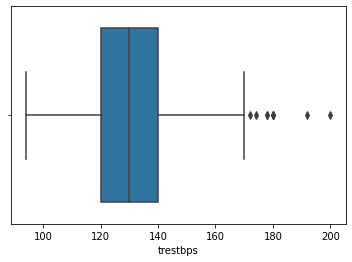

In [12]:
sns.boxplot(x=hrt['trestbps'])

<AxesSubplot:xlabel='trestbps'>

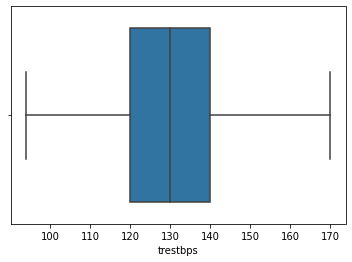

In [13]:
hrt = hrt.drop(hrt[(hrt['trestbps']>170)].index)
sns.boxplot(x=hrt['trestbps'])

**Cholestoral**

<AxesSubplot:xlabel='chol'>

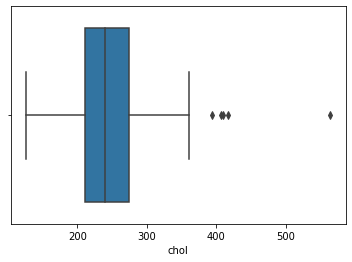

In [14]:
sns.boxplot(x=hrt['chol'])

<AxesSubplot:xlabel='chol'>

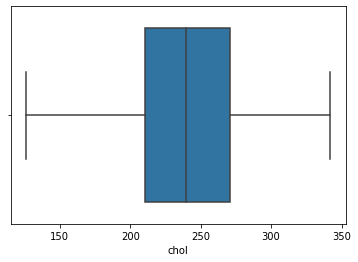

In [15]:
hrt = hrt.drop(hrt[(hrt['chol']>350)].index)
sns.boxplot(x=hrt['chol'])

**Thalach (max heart rate achieved)**

<AxesSubplot:xlabel='thalach'>

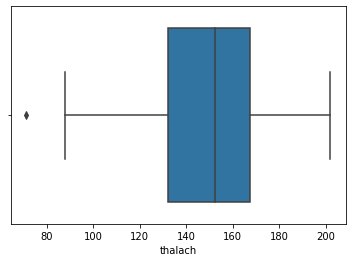

In [16]:
sns.boxplot(x=hrt['thalach'])

<AxesSubplot:xlabel='thalach'>

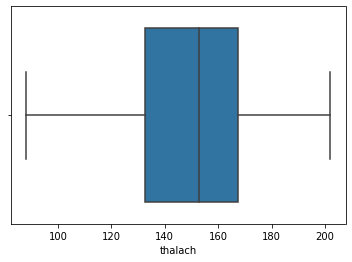

In [17]:
hrt = hrt.drop(hrt[(hrt['thalach']<80)].index)
sns.boxplot(x=hrt['thalach'])

**Old Peak**

<AxesSubplot:xlabel='oldpeak'>

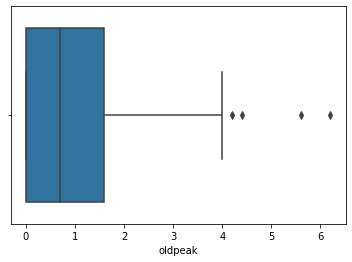

In [18]:
sns.boxplot(x=hrt['oldpeak'])

<AxesSubplot:xlabel='oldpeak'>

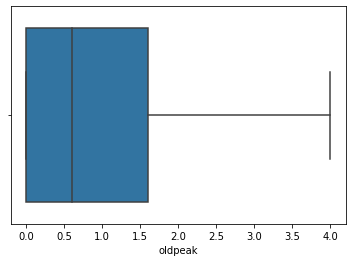

In [19]:
hrt = hrt.drop(hrt[(hrt['oldpeak']>4)].index)
sns.boxplot(x=hrt['oldpeak'])

****

# **CORRELATION OF COLUMNS**

Let's first find the correlations between all the columns to conclude that which column has strong correlation with other column

In [22]:
hrt.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.054608,0.098753,0.287802,0.157543,0.122650,0.142232,-0.413000,0.099222,0.201550,0.150301,0.393060,0.121363,0.235319
sex,-0.054608,1.000000,0.053623,0.002108,-0.110872,0.056678,0.064360,-0.053501,0.187210,0.164510,0.048627,0.124595,0.398396,0.304677
cp,0.098753,0.053623,1.000000,-0.062134,0.041724,-0.063427,0.091779,-0.331778,0.364465,0.193090,0.136676,0.222697,0.288138,0.402366
trestbps,0.287802,0.002108,-0.062134,1.000000,0.117645,0.130875,0.151660,-0.072094,0.006188,0.142611,0.085985,0.102147,0.088814,0.130433
chol,0.157543,-0.110872,0.041724,0.117645,1.000000,0.025695,0.137293,-0.012907,0.053188,-0.021495,-0.040283,0.126996,-0.000205,0.117027
fbs,0.122650,0.056678,-0.063427,0.130875,0.025695,1.000000,0.067844,-0.024782,-0.020084,0.018756,0.055563,0.163425,0.027350,0.000077
restecg,0.142232,0.064360,0.091779,0.151660,0.137293,0.067844,1.000000,-0.106101,0.125479,0.101292,0.132000,0.124067,-0.002267,0.186026
thalach,-0.413000,-0.053501,-0.331778,-0.072094,-0.012907,-0.024782,-0.106101,1.000000,-0.398277,-0.346760,-0.379453,-0.299713,-0.289454,-0.424522
exang,0.099222,0.187210,0.364465,0.006188,0.053188,-0.020084,0.125479,-0.398277,1.000000,0.324941,0.255798,0.161101,0.338125,0.418591
oldpeak,0.201550,0.164510,0.193090,0.142611,-0.021495,0.018756,0.101292,-0.346760,0.324941,1.000000,0.527969,0.238410,0.309229,0.428212


<AxesSubplot:>

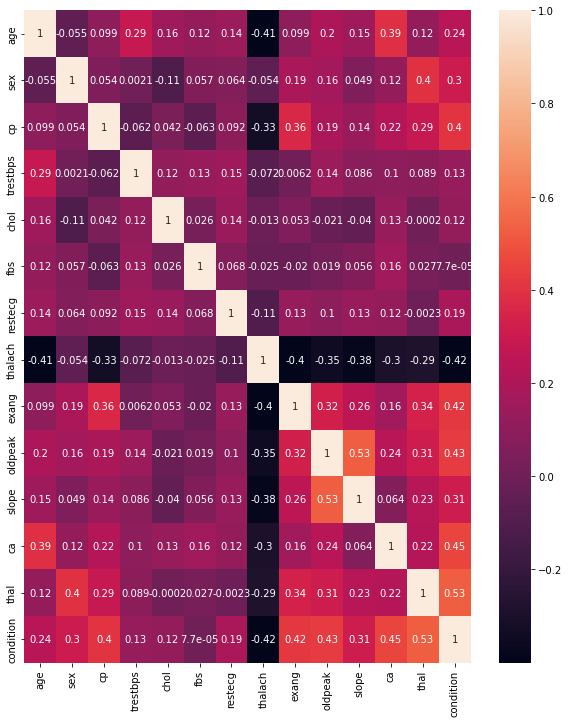

In [25]:
plt.figure(figsize=(10,12))
sns.heatmap(data=hrt.corr(), annot=True, robust=True)

**OBSERVATIONS**
* From above map, we can conclude that columns having correlation of more than 0.35 should be considered as a strong relation.
* The columns having more than specified corr are
1. Age and ca
2. Sex and thal
3. cp and exang, cp and condition
4. exang and condition
5. old peak and slope, old peak and condition
6. ca and condition
7. thal and condition



# **BIVARIATE ANALYSIS OF COLUMNS WITH STRONG CORREALTION**

**AGE AND CA**

<AxesSubplot:xlabel='ca', ylabel='age'>

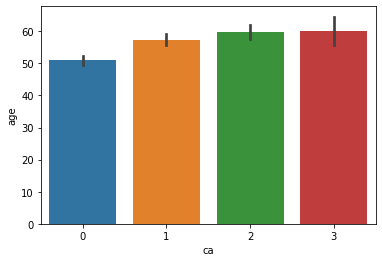

In [47]:
sns.barplot(x=hrt['ca'], y=hrt['age'])

**OBSERVATIONS**
* From above graph we understand that as the age increases there is more like to have type 2 and 3 coronary calcium scan attribute which has a strong corelation with the condition.
* The CA is mostly seen in the age group above 50.

**SEX AND THALESSEMIA**

<AxesSubplot:xlabel='thal', ylabel='count'>

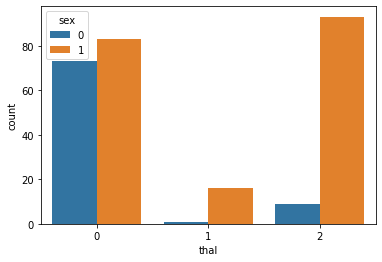

In [33]:
sns.countplot(x=hrt['thal'], hue=hrt['sex'])

**OBSERVATIONS**
* The data we have, Thalessemia type 0(normal) can be seen in both male and female
* Type 1(fixed defect) can be seen for more male than in female.
* Type 2(reverseble defect) can be seen in most of the male and very less in female.


* **CHEST PAIN AND EXERCISE INDUCED ANGINA**
* **CHEST PAIN AND CONDITION**

Text(0.5, 1.0, 'Chest pain Graph')

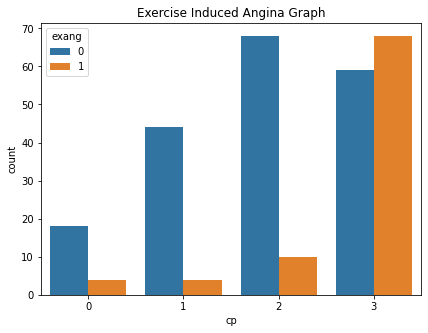

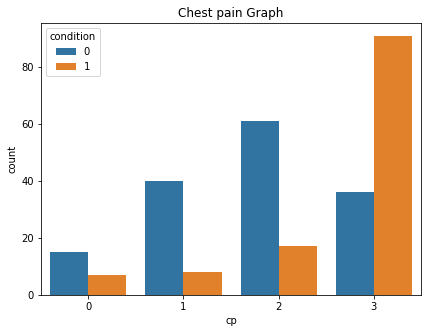

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=hrt['cp'], hue=hrt['exang'])
plt.title('Exercise Induced Angina Graph')

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x=hrt['cp'], hue=hrt['condition'])
plt.title('Chest pain Graph')

**OBSERVATIONS (Graph 1)**
* People having chest pain type 0,1,2 show very low chance of having exercise induced of angina.
* But incase of chest pain type 3 many do show exercise induced of angina.

**(Graph 2)**
* Chest pain type 0 and 1 show low chances of having the disease 
* Chest pain type 2 show a hike in chances of having disease as compared to type 0 and 1 but the chances of not having the disease is much more than having it, in the type 2.
* The rate of having the disease in chest pain type 3 is the maximum of all.

**EXERCISE INDUCED ANGINA AND CONDITION**

<AxesSubplot:xlabel='exang', ylabel='count'>

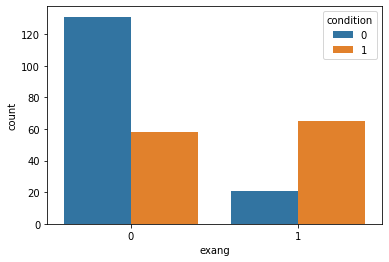

In [37]:
sns.countplot(x=hrt['exang'], hue=hrt['condition'])

**OBSERVATIONS**
* We can conclude that people having Exercise induced angina as well as not having excercise induced angina both show same rate of having disease
* But the number of people having no disease, have no excercise induced angina.

* **OLD PEAK AND SLOPE**
* **OLD PEAK AND CONDITION**

<Figure size 576x1440 with 0 Axes>

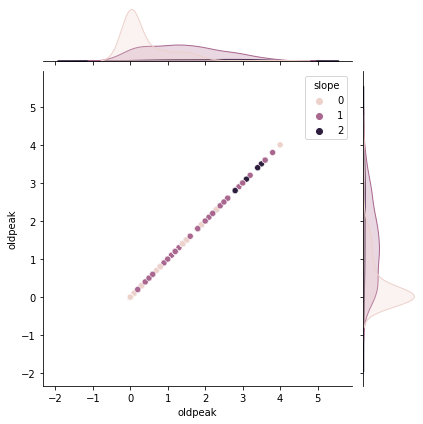

In [38]:
plt.figure(figsize=(8,20))
sns.jointplot(data=hrt, x='oldpeak',y='oldpeak', hue='slope')
plt.show()

**OBSERVATION**
* The above graph depicts that slope marking of 2 can be seen in the people having the old peak more than 2.5
* Slope means ST segment shift relative to exercise-induced increments in heart rate.

<Figure size 576x1440 with 0 Axes>

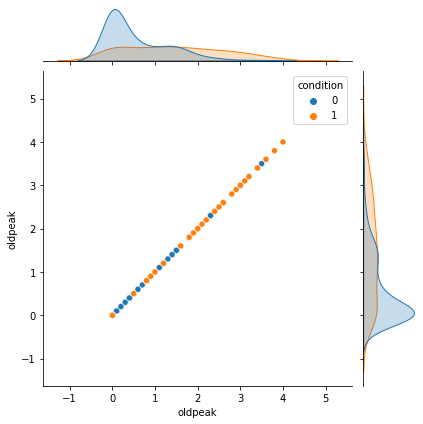

In [48]:
plt.figure(figsize=(8,20))
sns.jointplot(data=hrt, x='oldpeak',y='oldpeak', hue='condition')
plt.show()

**OBSERVATIONS**
* Same as the slope the condition stating that the person has heart disease is prominent after 2.
* The people having old peak more than 2 are more likely to have the disease.


**CA AND CONDITION**


<AxesSubplot:xlabel='ca', ylabel='count'>

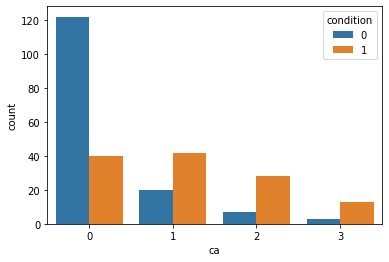

In [49]:
sns.countplot(x=hrt['ca'], hue=hrt['condition'])

**OBSERVATION**
* People having CA - 0 have more chances of not having the disease
* But for ca level 0 and 1, the rate of having disease is same.
* The ca with 3 has the lowest number of people not having the disease, but the rate of people having disease is more than the one not having which can conclude that ca 3 can be dangerous.

**THALESSEMIA AND CONDITION**

<AxesSubplot:xlabel='thal', ylabel='count'>

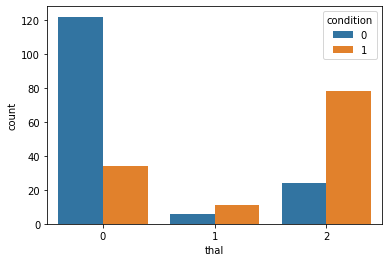

In [51]:
sns.countplot(x=hrt['thal'], hue=hrt['condition'])

**OBSERVATION**
* The highest rate of heart disease can be seen in thalessemia 2.
* The number of people having thal - 1,can be considered as people with no heart disease.
* People having thal-0, are more of not having the disease than having it.

DATA VISUALISING THE WHOLE DATASET

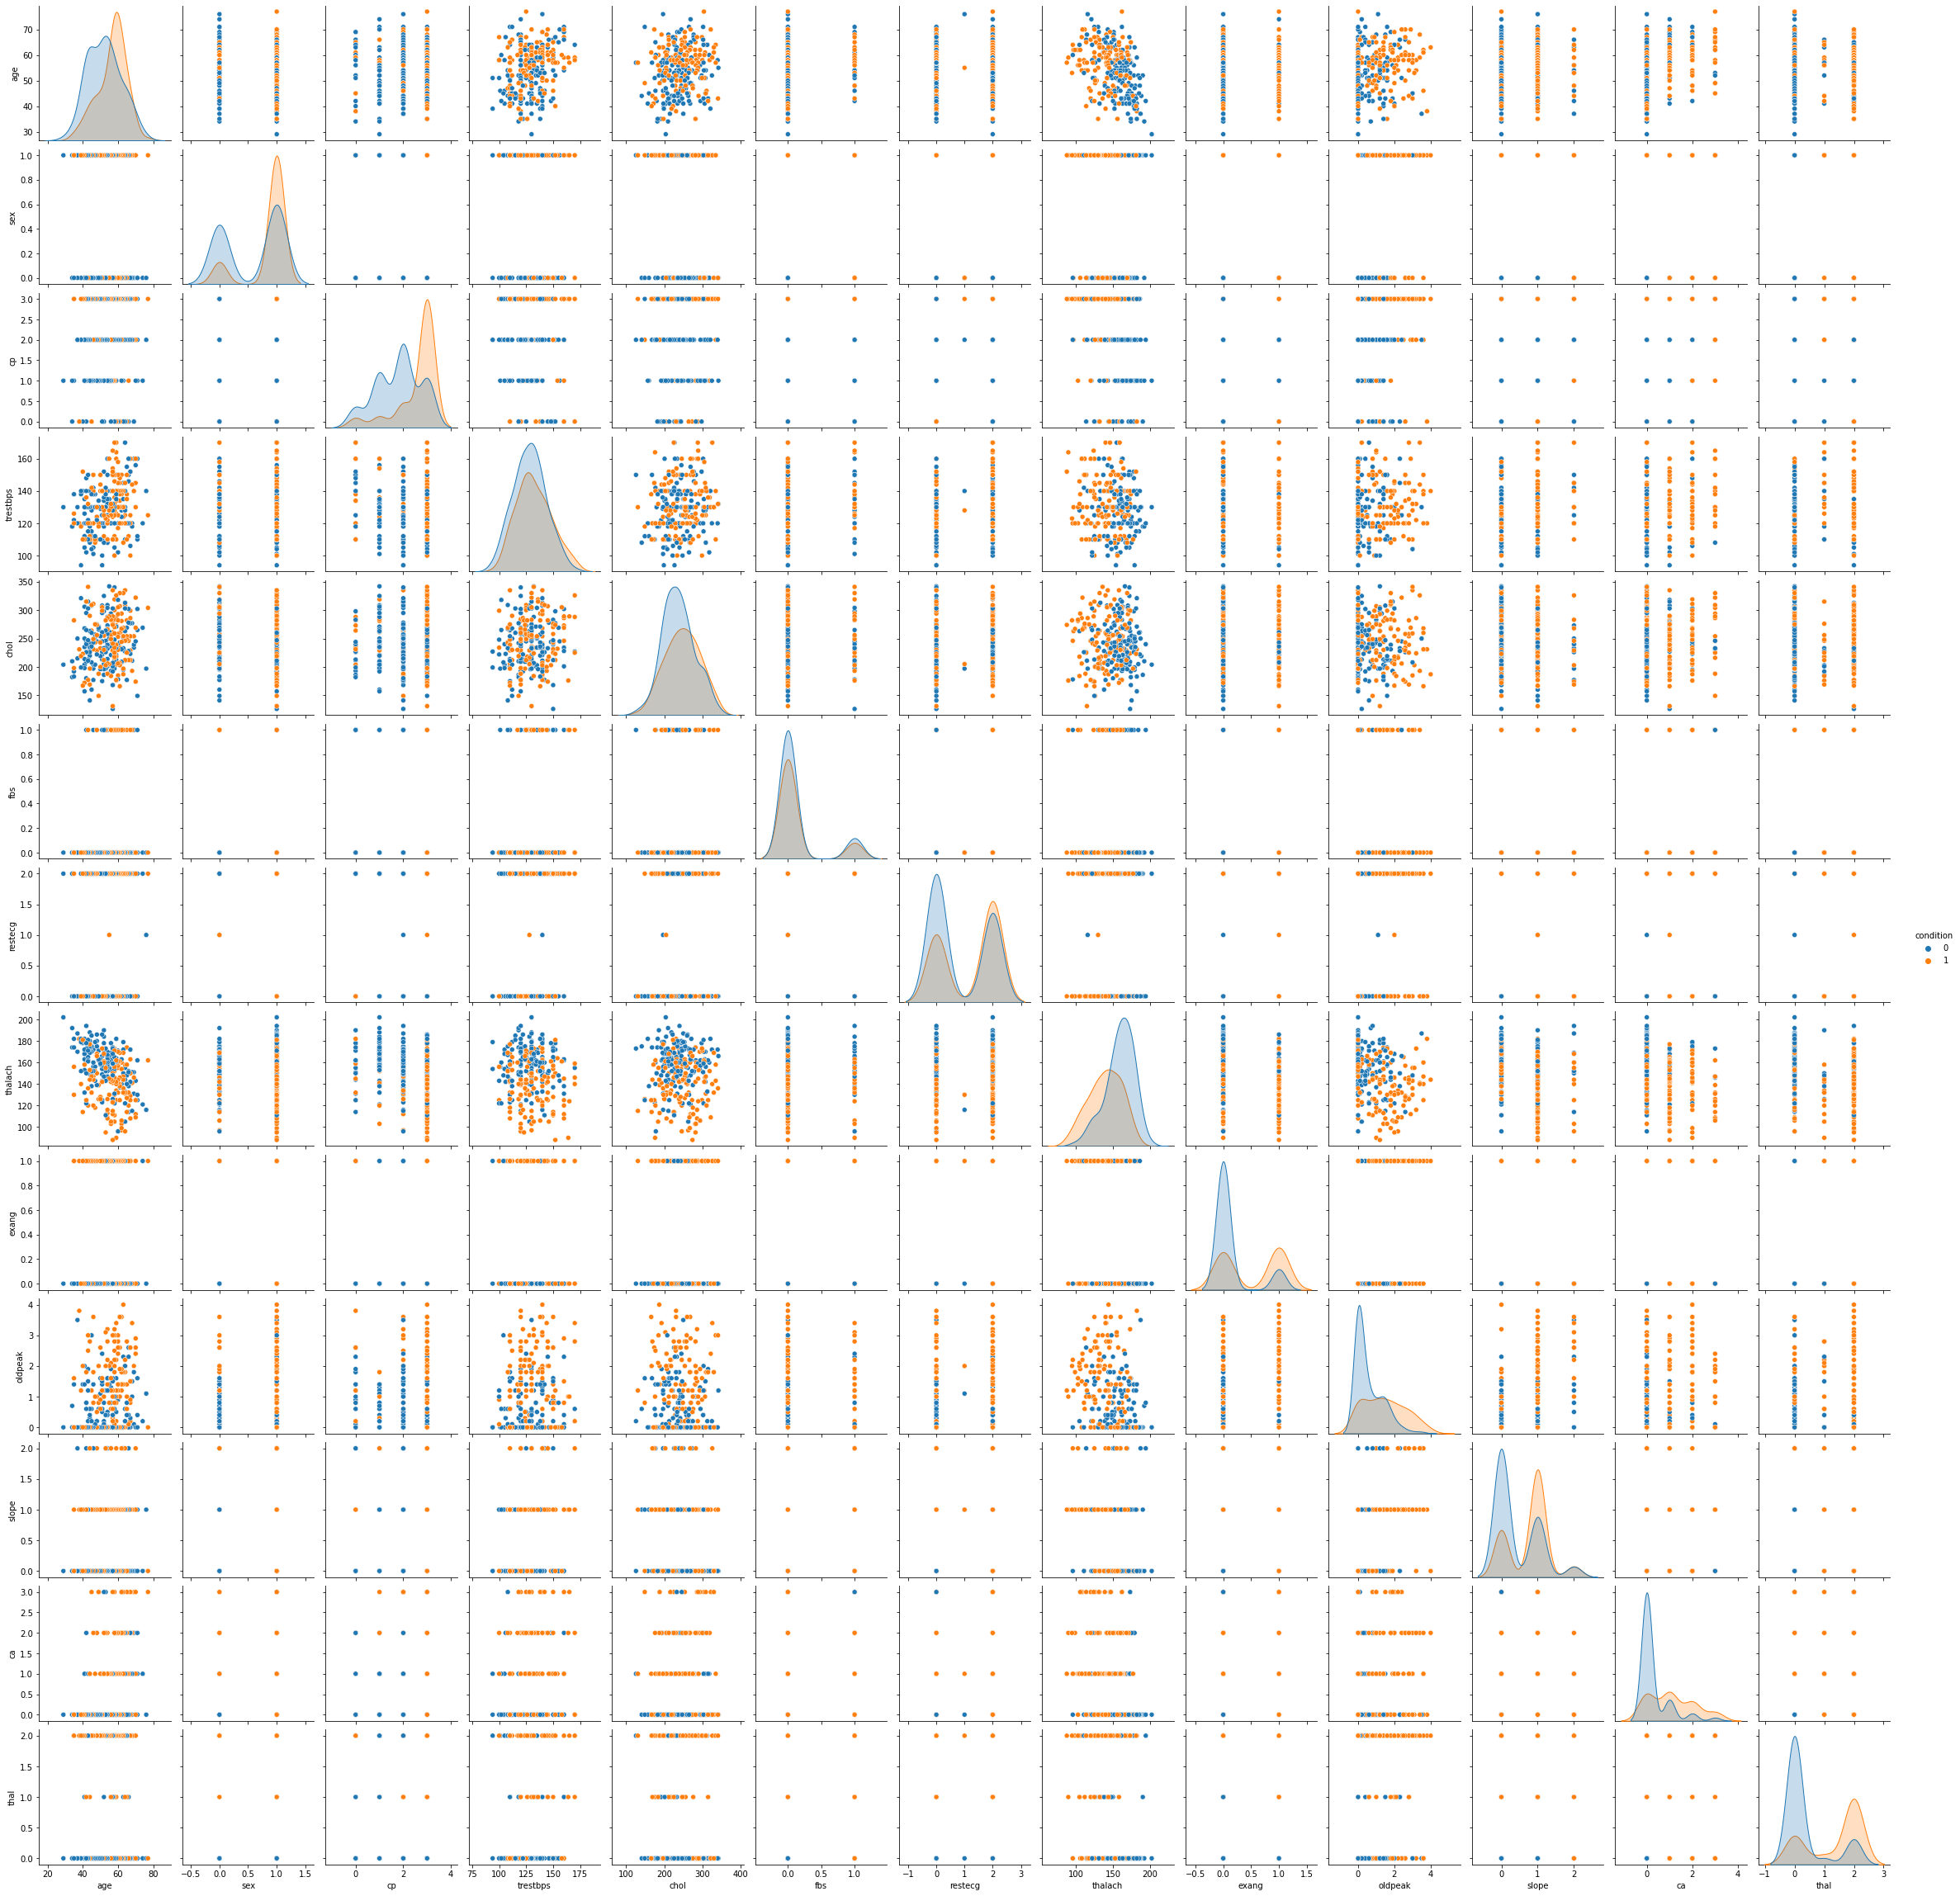

In [53]:
sns.pairplot(data=hrt, hue='condition')

# PREPARING THE MODEL

First split the data in train and test

In [54]:
x = hrt.drop('condition', axis=1)
y = hrt['condition']

x.shape, y.shape

((275, 13), (275,))

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, shuffle=True)

# **K-NN model**

In [57]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [58]:
knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=22)

In [59]:
y_pred_knn = knn_classifier.predict(x_test_std)

Calculating confusion matrix

In [60]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

[[31  2]
 [ 7 15]]
0.8363636363636363


In [61]:
print("Accuracy on training set: {:.3f}".format(knn_classifier.score(x_train_std, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_classifier.score(x_test_std, y_test)))

Accuracy on training set: 0.845
Accuracy on testing set: 0.836


In [62]:
knn_test = knn_classifier.score(x_test_std, y_test)

Let's find the number of neighbors to be considered.

In [63]:
scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(k).fit(x_train_std, y_train)
    scores.append(knn.score(x_train_std, y_train))

print(scores, end = " ")

[1.0, 0.85, 0.8818181818181818, 0.85, 0.85, 0.8545454545454545, 0.8454545454545455, 0.85, 0.8363636363636363, 0.8272727272727273, 0.8363636363636363, 0.8318181818181818, 0.8454545454545455, 0.8363636363636363, 0.85, 0.8409090909090909, 0.8590909090909091, 0.8409090909090909, 0.8409090909090909, 0.8454545454545455, 0.8409090909090909, 0.8454545454545455, 0.8363636363636363, 0.8363636363636363, 0.8318181818181818, 0.8318181818181818, 0.8318181818181818, 0.8318181818181818, 0.8272727272727273] 

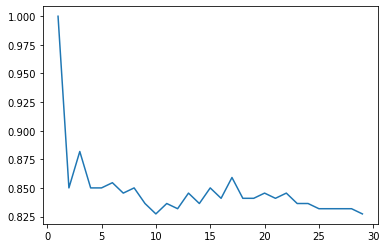

In [64]:
plt.plot(np.arange(1,30), scores)

# **DECISION TREE**

Train the model.

In [65]:
dt_class = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict the results

In [66]:
y_pred_dt = dt_class.predict(x_test)
print(y_pred_dt)

[1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1]


# **Confusion Matrix**

In [67]:
dt_cm = confusion_matrix(y_test,y_pred_dt)
print(dt_cm)
dt_acc = accuracy_score(y_test,y_pred_dt)
print(dt_acc)

[[27  6]
 [ 5 17]]
0.8


In [68]:
print("Accuracy on Training set: {:.3f}".format(dt_class.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(dt_class.score(x_test,y_test)))
dt_test = dt_class.score(x_test,y_test)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.800


/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

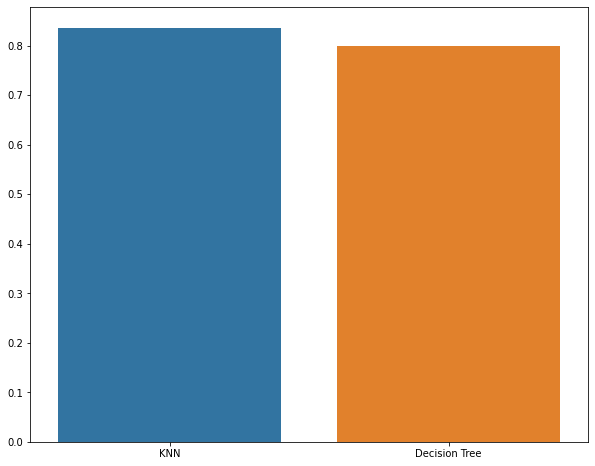

In [69]:
algorithms = ['KNN','Decision Tree']
scores = [knn_test, dt_test]
plt.figure(figsize=(10,8))
sns.barplot(algorithms, scores)

# **SVM**

In [70]:
svc_classifier = SVC(C=0.5)
svc_classifier.fit(x_train, y_train)

SVC(C=0.5)

In [71]:
y_pred_svc = svc_classifier.predict(x_test)
y_pred_svc

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# **CONFUSION MATRIX**

In [72]:
svc_cm = confusion_matrix(y_test,y_pred_svc)
print(svc_cm)
svc_acc = accuracy_score(y_test,y_pred_svc)
print(dt_acc)

[[32  1]
 [16  6]]
0.8


In [73]:
print("Accuracy on Training set: {:.3f}".format(svc_classifier.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(svc_classifier.score(x_test,y_test)))
svc_test = svc_classifier.score(x_test,y_test)

Accuracy on Training set: 0.655
Accuracy on Test set: 0.691


/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

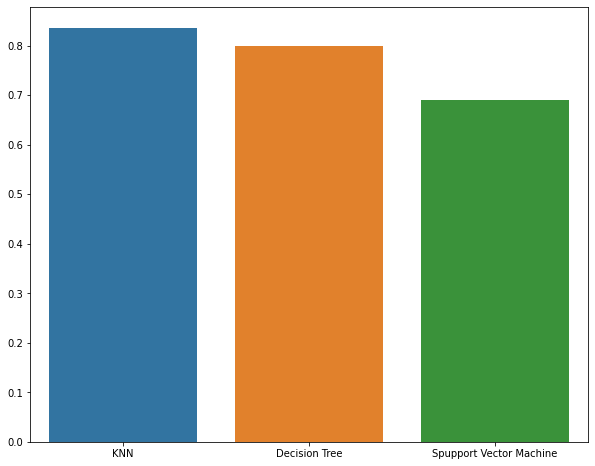

In [74]:
algorithms = ['KNN','Decision Tree','Spupport Vector Machine']
scores = [knn_test, dt_test, svc_test]
plt.figure(figsize=(10,8))
sns.barplot(algorithms, scores)

# **OBSERVATION**
* FROM ABOVE BAR PLOT WE CAN CONCLUDE THAT KNN BEST FITS THE DATA.